# TikTok Video Analysis


## Importing Packages and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Loading dataset into dataframe called 'tiktok_df'.

tiktok_df = pd.read_csv("tiktok_dataset.csv")

## Data Cleaning and Exploration

In [3]:
# Displaying the first few rows of the dataframe.

tiktok_df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Size of the data

tiktok_df.size

232584

In [5]:
# Shape of the data

tiktok_df.shape

(19382, 12)

In [6]:
# Basic information about the data

tiktok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Basic descriptive statistics

tiktok_df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
# Checking for missing values.

tiktok_df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Dropping the rows with missing values.

tiktok_df = tiktok_df.dropna(axis=0)

In [10]:
# Checking for unique values.

tiktok_df.nunique()

#                           19084
claim_status                    2
video_id                    19084
video_duration_sec             56
video_transcription_text    19012
verified_status                 2
author_ban_status               3
video_view_count            15632
video_like_count            12224
video_share_count            9231
video_download_count         4336
video_comment_count          2424
dtype: int64

<AxesSubplot:>

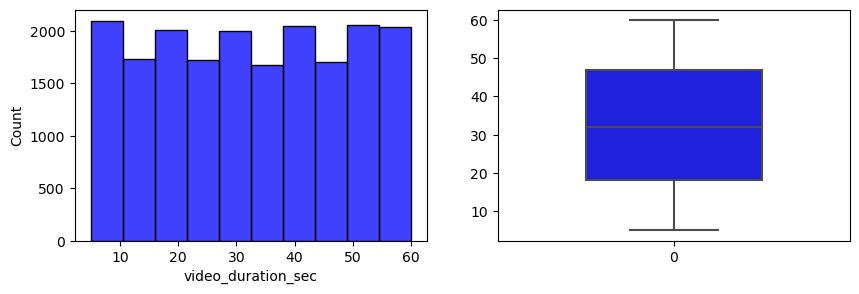

In [11]:
# Histogram and boxplot of 'video_duration_sec'

plt.figure(figsize = (10, 3))

plt.subplot(1,2,1)
sns.histplot(tiktok_df['video_duration_sec'], bins = 10, color = 'blue')

plt.subplot(1,2,2)
sns.boxplot(data = tiktok_df['video_duration_sec'], color = 'blue', width = 0.5)

<AxesSubplot:>

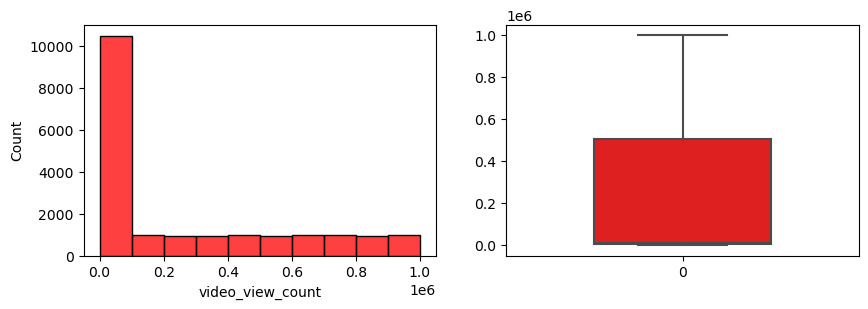

In [12]:
# Histogram and boxplot of 'video_view_count'

plt.figure(figsize = (10, 3))

plt.subplot(1,2,1)
sns.histplot(data = tiktok_df['video_view_count'], bins = 10, color = 'red')

plt.subplot(1,2,2)
sns.boxplot(data = tiktok_df['video_view_count'], color = 'red', width = 0.5)

<AxesSubplot:>

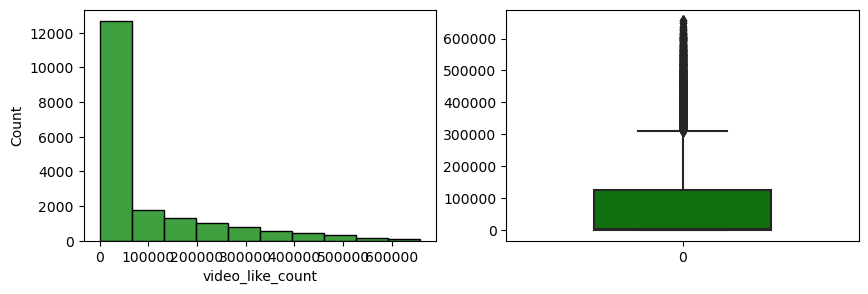

In [13]:
# Histogram and boxplot of 'video_like_count'

plt.figure(figsize = (10, 3))

plt.subplot(1,2,1)
sns.histplot(data = tiktok_df['video_like_count'], bins = 10, color = 'green')

plt.subplot(1,2,2)
sns.boxplot(data = tiktok_df['video_like_count'], color = 'green', width = 0.5)

<AxesSubplot:>

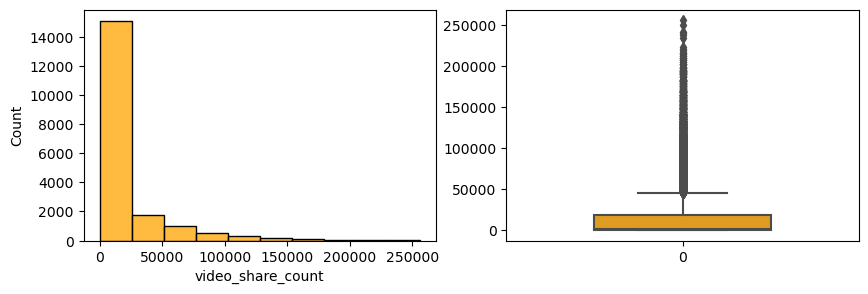

In [14]:
# Histogram and boxplot of 'video_share_count'

plt.figure(figsize = (10, 3))

plt.subplot(1,2,1)
sns.histplot(data = tiktok_df['video_share_count'], bins = 10, color = 'orange')

plt.subplot(1,2,2)
sns.boxplot(data = tiktok_df['video_share_count'], color = 'orange', width = 0.5)

<AxesSubplot:>

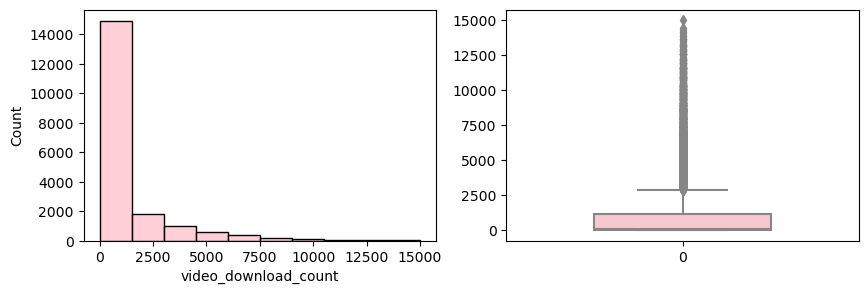

In [15]:
# Histogram and boxplot of 'video_download_count'

plt.figure(figsize = (10, 3))

plt.subplot(1,2,1)
sns.histplot(data = tiktok_df['video_download_count'], bins = 10, color = 'pink')

plt.subplot(1,2,2)
sns.boxplot(data = tiktok_df['video_download_count'], color = 'pink', width = 0.5)

<AxesSubplot:>

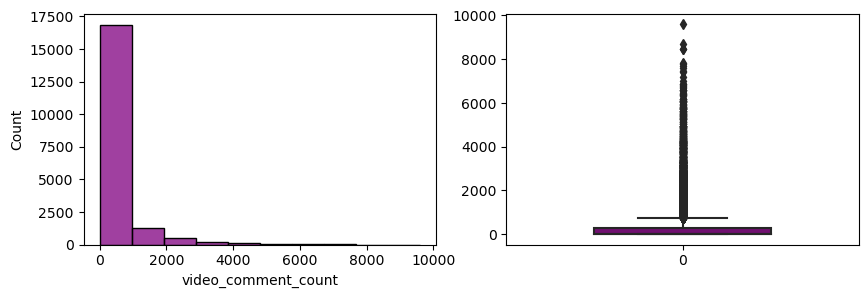

In [16]:
# Histogram and boxplot of 'video_comment_count'

plt.figure(figsize = (10, 3))

plt.subplot(1,2,1)
sns.histplot(data = tiktok_df['video_comment_count'], bins = 10, color = 'purple')

plt.subplot(1,2,2)
sns.boxplot(data = tiktok_df['video_comment_count'], color = 'purple', width = 0.5)

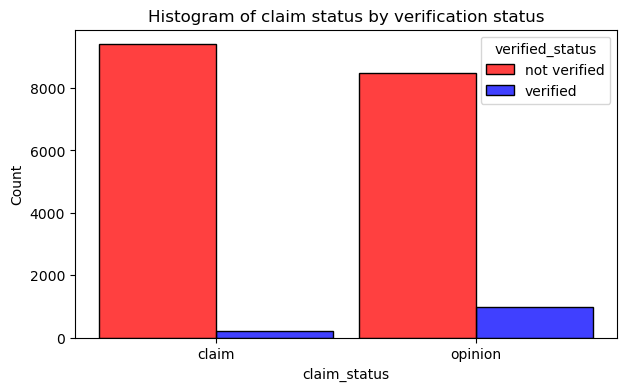

In [17]:
# Histogram of claim status by verification status.

color = ['red', 'blue']
plt.figure(figsize = (7,4))
sns.histplot(data = tiktok_df, x = 'claim_status', hue = 'verified_status', palette = color, multiple ='dodge', shrink = 0.9)
plt.title('Histogram of claim status by verification status');

#### The number of unverified users is much higher than the number of verified users. However, if a user is verified, they are much likely to post opinions rather than claims.

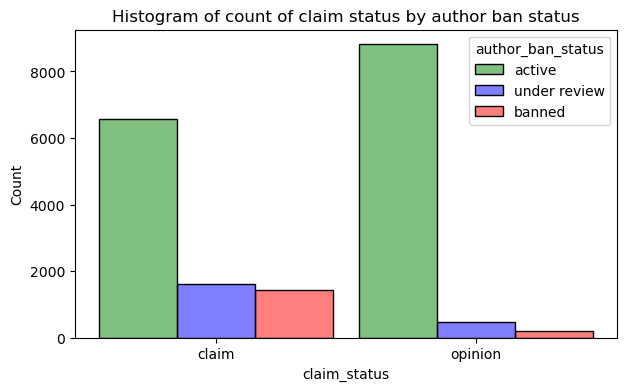

In [18]:
# Histogram of count of claim status by author ban status.

color = ['green', 'blue', 'red']
plt.figure(figsize = (7,4))
sns.histplot(data = tiktok_df, x = 'claim_status', hue = 'author_ban_status', multiple = 'dodge', hue_order = ['active', 'under review', 'banned'], shrink = 0.9, palette = color, alpha = 0.5)
plt.title('Histogram of count of claim status by author ban status');

#### For both claims and opinions, there are a lot more active authors than under review or banned authors. However, the proportion of active authors is much more for opinion videos than for claim videos. Also, it seems that authors who post claim videos are more likely to come under review and/or get banned.

In [19]:
# Handling outliers

column_count = ['video_view_count', 'video_like_count', 'video_comment_count', 'video_share_count', 'video_download_count']

for i in column_count:
    Q1 = tiktok_df[i].quantile(0.25)
    Q3 = tiktok_df[i].quantile(0.75)
    
    iqr = Q3 - Q1
    median = tiktok_df[i].median()
    outlier_threshold = median + 1.5 * iqr
    
    outlier_upper_limit = tiktok_df[i] > outlier_threshold
    outlier_lower_limit = tiktok_df[i] < outlier_threshold
    
    tiktok_df = tiktok_df[~(outlier_upper_limit & outlier_lower_limit)]

In [20]:
tiktok_df["verified_status"].value_counts(normalize = True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

#### It is evident that there is class imbalance 

In [21]:
# Upsampling

not_verified = tiktok_df[tiktok_df["verified_status"] == "not verified"]
verified = tiktok_df[tiktok_df["verified_status"] == "verified"]
new_verified = resample(verified, replace = True, n_samples = len(not_verified), random_state = 42)  
data = pd.concat([not_verified, new_verified])
print(data["verified_status"].value_counts(normalize = True))

not verified    0.5
verified        0.5
Name: verified_status, dtype: float64


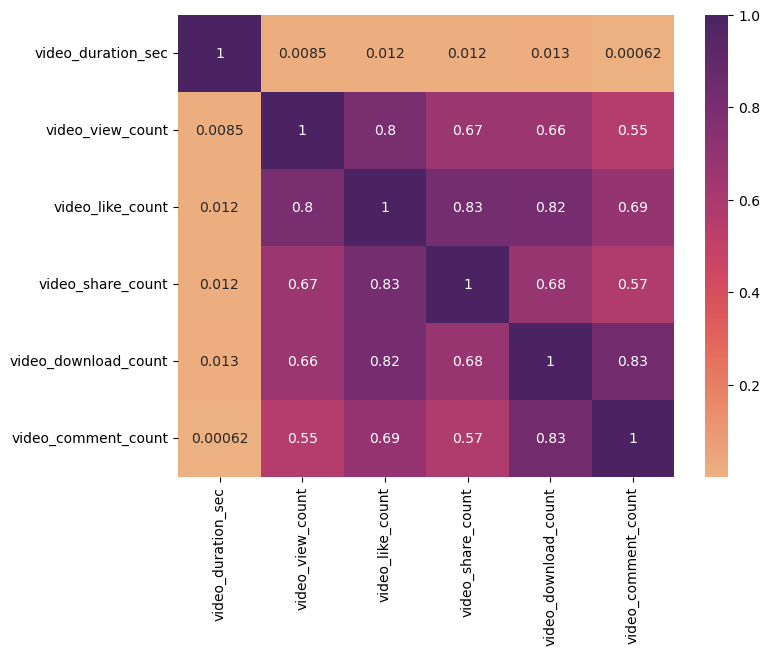

In [22]:
# Correlation heatmap

plt.figure(figsize = (8, 6))
sns.heatmap(tiktok_df[["video_duration_sec", "video_view_count", "video_like_count", "video_share_count", "video_download_count", "video_comment_count"]].corr(), annot = True, cmap = "flare")
plt.show()

#### It is pretty evident from the above correlation heatmap, that the features 'video_view_count' and 'video_like_count' are highly correlated with each other. So, these features can be dropped.

## Model Building and Evaluation

In [23]:
# Variable encoding 

dummy_data = data.copy()
dummy_data['verified_status'] = dummy_data['verified_status'].replace({'not verified' : False,'verified' : True})
dummy_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,False,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,False,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,False,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,False,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,False,active,56167.0,34987.0,4110.0,547.0,152.0


In [29]:
# Select features and outcome variables

X = dummy_data[['video_duration_sec', 'video_view_count', 'video_share_count', 'video_download_count', 'video_comment_count']]
Y = dummy_data['verified_status']

In [30]:
# Split the data into train and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [31]:
# Fit the model

model = LogisticRegression().fit(X_train, Y_train)

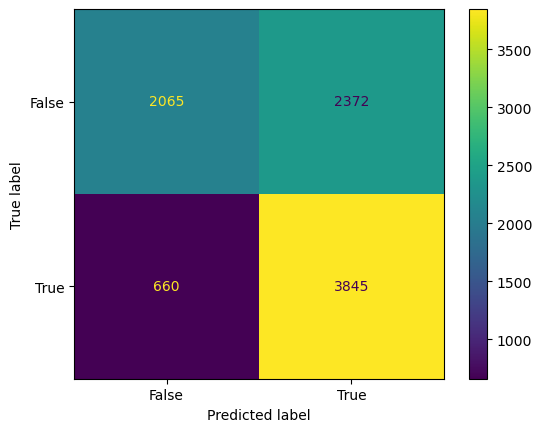

In [37]:
# Confusion Matrix

Y_predict = model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_predict, labels = model.classes_) 
cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm.plot()
plt.show()

In [38]:
# Classification Report

target = ["verified", "not verified"]
print(classification_report(Y_test, Y_predict, target_names = target))

              precision    recall  f1-score   support

    verified       0.76      0.47      0.58      4437
not verified       0.62      0.85      0.72      4505

    accuracy                           0.66      8942
   macro avg       0.69      0.66      0.65      8942
weighted avg       0.69      0.66      0.65      8942

